# Data Preparation der Messwerte

In [1]:
from io import StringIO
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

### Einlesen und Messwerte extrahieren

In [2]:
# Dateipfad
dateipfad = "original_data/ExpDat_CSEW_1-10.txt"

# Datei auslesen
with open(dateipfad, "r") as datei:
    # Lese den gesamten Inhalt der Datei
    inhalt = datei.read()

_ , measurements_text = inhalt.strip().split("##")
measurements_text

'Temp./°C;DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg);DSC/(mW/mg)\n-52.65517;             ;             ;             ;            ;             ;0.14225;             ;             ;-2.992396e-02;             ;             ;-3.364845e-02;             ;             ;-3.613689e-02;             ;             ;-3.432751e-02;            ;             ;-3.989840e-02;            ;             ;0.10237;             ;             ;0.11495;             ;             ;0.10098\n-51.65517;             ;             ;-1.244860e-03;            ;             ;0.14225;             ;             ;      0.38706;             ;             ;      0.39655;             ;             ;      0.41421;            

In [3]:
measurements_df = pd.read_csv(StringIO(measurements_text), sep=';', index_col=0)
measurements_df = measurements_df.apply(pd.to_numeric, errors='coerce')
measurements_df 

,DSC/(mW/mg),DSC/(mW/mg).1,DSC/(mW/mg).2,DSC/(mW/mg).3,DSC/(mW/mg).4,DSC/(mW/mg).5,DSC/(mW/mg).6,DSC/(mW/mg).7,DSC/(mW/mg).8,DSC/(mW/mg).9,...,DSC/(mW/mg).20,DSC/(mW/mg).21,DSC/(mW/mg).22,DSC/(mW/mg).23,DSC/(mW/mg).24,DSC/(mW/mg).25,DSC/(mW/mg).26,DSC/(mW/mg).27,DSC/(mW/mg).28,DSC/(mW/mg).29
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-52.65517,NaN,NaN,NaN,NaN,NaN,0.14225,NaN,NaN,-0.029924,NaN,...,-0.039898,NaN,NaN,0.10237,NaN,NaN,0.11495,NaN,NaN,0.10098
-51.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.387060,NaN,...,0.342470,NaN,NaN,0.10237,NaN,NaN,0.11495,NaN,NaN,0.10098
-50.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.385080,NaN,...,0.356910,NaN,NaN,0.34722,NaN,NaN,0.11495,NaN,NaN,0.10098
-49.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.377390,NaN,...,0.364270,NaN,NaN,0.34944,NaN,NaN,0.34142,NaN,NaN,0.30620
-48.65517,NaN,NaN,0.307630,NaN,NaN,0.29038,NaN,NaN,0.368820,NaN,...,0.365330,NaN,NaN,0.34654,NaN,NaN,0.34173,NaN,NaN,0.31276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295.34483,0.48494,-0.528240,0.470630,0.44773,-0.554300,0.42807,0.48141,-0.546070,0.460850,0.43996,...,0.409020,0.49630,-0.626420,0.47793,0.53621,-0.592380,0.52713,0.51470,-0.568370,0.49530
296.34483,0.48507,-0.463640,0.471540,0.44802,-0.500390,0.42865,0.48213,-0.491790,0.461690,0.44016,...,0.409510,0.49622,-0.568280,0.47866,0.53647,-0.525970,0.52790,0.51516,-0.498870,0.49587
297.34483,0.48494,-0.360890,0.472330,0.44790,-0.411990,0.42943,0.48211,-0.402340,0.462620,0.44011,...,0.410200,0.49632,-0.468390,0.47954,0.53691,-0.419910,0.52888,0.51560,-0.389830,0.49663


## 1. Anpassung der Spaltennamen

In [4]:
info_df = pd.read_csv("data/relevant_info.csv", sep=";")
info_df.head(9)

,file,identity,sample,sample mass_mg,range,segment
0,CSEW1.ngb-sdg,C1,C1,20.76,20°C/20.0(K/min)/300°C,S1/5
1,CSEW1.ngb-sdg,C1,C1,20.76,300°C/20.0(K/min)/-50°C,S3/5
2,CSEW1.ngb-sdg,C1,C1,20.76,-50°C/20.0(K/min)/300°C,S5/5
3,CSEW2.ngb-sdg,C2,C2,20.44,20°C/20.0(K/min)/300°C,S1/5
4,CSEW2.ngb-sdg,C2,C2,20.44,300°C/20.0(K/min)/-50°C,S3/5
5,CSEW2.ngb-sdg,C2,C2,20.44,-50°C/20.0(K/min)/300°C,S5/5
6,CSEW3.ngb-sdg,C3,C3,20.22,20°C/20.0(K/min)/300°C,S1/5
7,CSEW3.ngb-sdg,C3,C3,20.22,300°C/20.0(K/min)/-50°C,S3/5
8,CSEW3.ngb-sdg,C3,C3,20.22,-50°C/20.0(K/min)/300°C,S5/5


In [5]:
# Überprüfung, ob Anzahl der Info-Einträge mit der Anzahl der Spalten des Messwert-Dataframes übereinstimmt
print(f"Anzahl der 'Mess-Serien': {len(info_df)}")
print(f"Correct: {len(info_df) == len(measurements_df.columns)}")
num_cols = len(info_df)

Anzahl der 'Mess-Serien': 30
Correct: True


In [6]:
new_columns = [info_df.at[i, 'identity'] + '_' + info_df.at[i, 'segment'] for i in range(num_cols)]
print(new_columns)

['C1_S1/5', 'C1_S3/5', 'C1_S5/5', 'C2_S1/5', 'C2_S3/5', 'C2_S5/5', 'C3_S1/5', 'C3_S3/5', 'C3_S5/5', 'C4_S1/5', 'C4_S3/5', 'C4_S5/5', 'C5_S1/5', 'C5_S3/5', 'C5_S5/5', 'C6_S1/5', 'C6_S3/5', 'C6_S5/5', 'C7_S1/5', 'C7_S3/5', 'C7_S5/5', 'C8_S1/5', 'C8_S3/5', 'C8_S5/5', 'C9_S1/5', 'C9_S3/5', 'C9_S5/5', 'C10_S1/5', 'C10_S3/5', 'C10_S5/5']


In [7]:
measurements_df.columns = new_columns
measurements_df

,C1_S1/5,C1_S3/5,C1_S5/5,C2_S1/5,C2_S3/5,C2_S5/5,C3_S1/5,C3_S3/5,C3_S5/5,C4_S1/5,...,C7_S5/5,C8_S1/5,C8_S3/5,C8_S5/5,C9_S1/5,C9_S3/5,C9_S5/5,C10_S1/5,C10_S3/5,C10_S5/5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-52.65517,NaN,NaN,NaN,NaN,NaN,0.14225,NaN,NaN,-0.029924,NaN,...,-0.039898,NaN,NaN,0.10237,NaN,NaN,0.11495,NaN,NaN,0.10098
-51.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.387060,NaN,...,0.342470,NaN,NaN,0.10237,NaN,NaN,0.11495,NaN,NaN,0.10098
-50.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.385080,NaN,...,0.356910,NaN,NaN,0.34722,NaN,NaN,0.11495,NaN,NaN,0.10098
-49.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.377390,NaN,...,0.364270,NaN,NaN,0.34944,NaN,NaN,0.34142,NaN,NaN,0.30620
-48.65517,NaN,NaN,0.307630,NaN,NaN,0.29038,NaN,NaN,0.368820,NaN,...,0.365330,NaN,NaN,0.34654,NaN,NaN,0.34173,NaN,NaN,0.31276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295.34483,0.48494,-0.528240,0.470630,0.44773,-0.554300,0.42807,0.48141,-0.546070,0.460850,0.43996,...,0.409020,0.49630,-0.626420,0.47793,0.53621,-0.592380,0.52713,0.51470,-0.568370,0.49530
296.34483,0.48507,-0.463640,0.471540,0.44802,-0.500390,0.42865,0.48213,-0.491790,0.461690,0.44016,...,0.409510,0.49622,-0.568280,0.47866,0.53647,-0.525970,0.52790,0.51516,-0.498870,0.49587
297.34483,0.48494,-0.360890,0.472330,0.44790,-0.411990,0.42943,0.48211,-0.402340,0.462620,0.44011,...,0.410200,0.49632,-0.468390,0.47954,0.53691,-0.419910,0.52888,0.51560,-0.389830,0.49663


In [8]:
def replace_column(column_name):
    # Text in Kleinbuchstaben umwandeln, dann "/" durch "_" ersetzen und "/5" entfernen
    return column_name.replace("/5", "")

In [9]:
measurements_df = measurements_df.rename(columns=replace_column)
measurements_df

,C1_S1,C1_S3,C1_S5,C2_S1,C2_S3,C2_S5,C3_S1,C3_S3,C3_S5,C4_S1,...,C7_S5,C8_S1,C8_S3,C8_S5,C9_S1,C9_S3,C9_S5,C10_S1,C10_S3,C10_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-52.65517,NaN,NaN,NaN,NaN,NaN,0.14225,NaN,NaN,-0.029924,NaN,...,-0.039898,NaN,NaN,0.10237,NaN,NaN,0.11495,NaN,NaN,0.10098
-51.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.387060,NaN,...,0.342470,NaN,NaN,0.10237,NaN,NaN,0.11495,NaN,NaN,0.10098
-50.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.385080,NaN,...,0.356910,NaN,NaN,0.34722,NaN,NaN,0.11495,NaN,NaN,0.10098
-49.65517,NaN,NaN,-0.001245,NaN,NaN,0.14225,NaN,NaN,0.377390,NaN,...,0.364270,NaN,NaN,0.34944,NaN,NaN,0.34142,NaN,NaN,0.30620
-48.65517,NaN,NaN,0.307630,NaN,NaN,0.29038,NaN,NaN,0.368820,NaN,...,0.365330,NaN,NaN,0.34654,NaN,NaN,0.34173,NaN,NaN,0.31276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295.34483,0.48494,-0.528240,0.470630,0.44773,-0.554300,0.42807,0.48141,-0.546070,0.460850,0.43996,...,0.409020,0.49630,-0.626420,0.47793,0.53621,-0.592380,0.52713,0.51470,-0.568370,0.49530
296.34483,0.48507,-0.463640,0.471540,0.44802,-0.500390,0.42865,0.48213,-0.491790,0.461690,0.44016,...,0.409510,0.49622,-0.568280,0.47866,0.53647,-0.525970,0.52790,0.51516,-0.498870,0.49587
297.34483,0.48494,-0.360890,0.472330,0.44790,-0.411990,0.42943,0.48211,-0.402340,0.462620,0.44011,...,0.410200,0.49632,-0.468390,0.47954,0.53691,-0.419910,0.52888,0.51560,-0.389830,0.49663


###  Plot

In [10]:
def plot_columns_containing(df, sample, segment = None, exclude=None):
    if segment is not None:
          pattern = rf'{sample}(?![0-9])_{segment}'  
    elif exclude is not None:
        pattern = rf'{sample}(?![0-9])_(?!{exclude})'
    else:
        pattern = rf'{sample}(?![0-9])'
        
        
    cx_columns = [col for col in df.columns if re.search(pattern, col)]
    for col in cx_columns:
        plt.plot(df[col], label=col)
    
    plt.xlabel('Temperatur in °C')
    plt.ylabel('DSC in mW/mg')
    plt.title(f'Plot für Sample "{sample}"')
    plt.legend()
    plt.show()


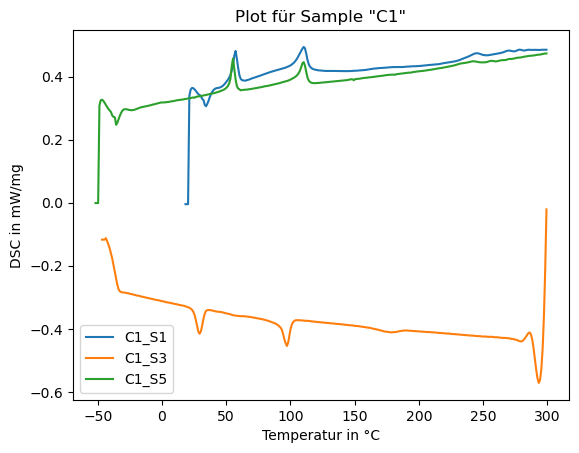

In [11]:
plot_columns_containing(measurements_df, "C1", exclude=None)

In [12]:
dframe = measurements_df.copy() # für 2. Alternative

## 2. Entfernung des Rauschens (Anfangs- und Endwerte)

In [13]:
measurements_df = measurements_df.iloc[25:-25]
measurements_df

,C1_S1,C1_S3,C1_S5,C2_S1,C2_S3,C2_S5,C3_S1,C3_S3,C3_S5,C4_S1,...,C7_S5,C8_S1,C8_S3,C8_S5,C9_S1,C9_S3,C9_S5,C10_S1,C10_S3,C10_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-27.65517,NaN,-0.28629,0.29632,NaN,-0.26812,0.27996,NaN,-0.25642,0.29215,NaN,...,0.28233,NaN,-0.29654,0.30878,NaN,-0.31436,0.31452,NaN,-0.29660,0.30051
-26.65517,NaN,-0.28742,0.29556,NaN,-0.26919,0.27943,NaN,-0.27181,0.29010,NaN,...,0.28116,NaN,-0.30165,0.30859,NaN,-0.31737,0.31461,NaN,-0.29747,0.30048
-25.65517,NaN,-0.28762,0.29407,NaN,-0.26998,0.27876,NaN,-0.28293,0.28855,NaN,...,0.28004,NaN,-0.30235,0.30855,NaN,-0.31748,0.31490,NaN,-0.29811,0.30045
-24.65517,NaN,-0.28922,0.29382,NaN,-0.27078,0.27855,NaN,-0.28939,0.28784,NaN,...,0.27953,NaN,-0.30312,0.30881,NaN,-0.31861,0.31546,NaN,-0.29897,0.30092
-23.65517,NaN,-0.28983,0.29302,NaN,-0.27162,0.27881,NaN,-0.29127,0.28790,NaN,...,0.27936,NaN,-0.30380,0.30936,NaN,-0.31938,0.31627,NaN,-0.29999,0.30178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270.34483,0.48226,-0.42968,0.45576,0.44551,-0.42925,0.41479,0.47739,-0.42917,0.44651,0.43974,...,0.39977,0.49512,-0.48689,0.46568,0.53158,-0.47484,0.50892,0.50868,-0.45957,0.47928
271.34483,0.48173,-0.43157,0.45590,0.44583,-0.43115,0.41533,0.47813,-0.43063,0.44700,0.43981,...,0.40013,0.49566,-0.48951,0.46614,0.53222,-0.47693,0.50965,0.50922,-0.46179,0.47999
272.34483,0.48077,-0.43195,0.45604,0.44602,-0.43184,0.41592,0.47872,-0.43102,0.44750,0.44043,...,0.40046,0.49669,-0.49016,0.46663,0.53283,-0.47751,0.51039,0.50983,-0.46230,0.48067


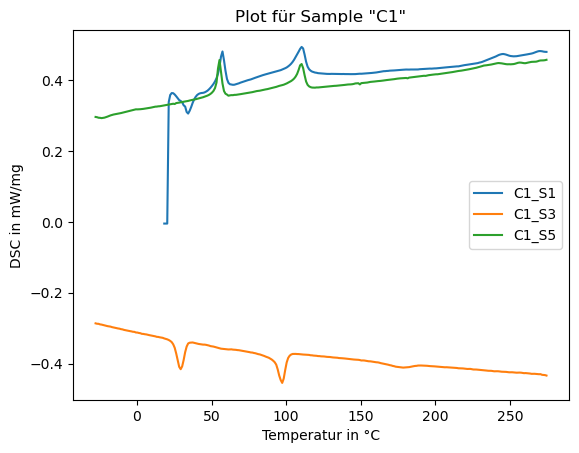

In [14]:
plot_columns_containing(measurements_df, "C1", exclude=None)

### Alternativer Ansatz
> - die ersten 25 Werte (ab ersten nicht NaN-Wert) werden auf NaN gesetzt
> - dann werden die ersten und letzen 25 Werte werden abgeschnitten

**➔**  Hier wird Segment 1 berücksichtigt


In [15]:
# Iteriere über alle Spalten und ersetze die ersten 25 Werte jeder Spalte durch NaN (ab validen notNaN-Werten)
for col in dframe.columns:
    valid_temp = dframe[col].first_valid_index()
    valid_index = dframe.index.get_loc(valid_temp)
    
    if valid_index is not None:
        dframe[col].iloc[valid_index:valid_index+20] = np.nan

# letzen 25 Abschneiden
dframe = dframe.iloc[25:-25]
dframe

,C1_S1,C1_S3,C1_S5,C2_S1,C2_S3,C2_S5,C3_S1,C3_S3,C3_S5,C4_S1,...,C7_S5,C8_S1,C8_S3,C8_S5,C9_S1,C9_S3,C9_S5,C10_S1,C10_S3,C10_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-27.65517,NaN,NaN,0.29632,NaN,NaN,0.27996,NaN,NaN,0.29215,NaN,...,0.28233,NaN,NaN,0.30878,NaN,NaN,0.31452,NaN,NaN,0.30051
-26.65517,NaN,-0.28742,0.29556,NaN,NaN,0.27943,NaN,NaN,0.29010,NaN,...,0.28116,NaN,NaN,0.30859,NaN,NaN,0.31461,NaN,NaN,0.30048
-25.65517,NaN,-0.28762,0.29407,NaN,NaN,0.27876,NaN,NaN,0.28855,NaN,...,0.28004,NaN,NaN,0.30855,NaN,NaN,0.31490,NaN,NaN,0.30045
-24.65517,NaN,-0.28922,0.29382,NaN,-0.27078,0.27855,NaN,NaN,0.28784,NaN,...,0.27953,NaN,-0.30312,0.30881,NaN,-0.31861,0.31546,NaN,-0.29897,0.30092
-23.65517,NaN,-0.28983,0.29302,NaN,-0.27162,0.27881,NaN,-0.29127,0.28790,NaN,...,0.27936,NaN,-0.30380,0.30936,NaN,-0.31938,0.31627,NaN,-0.29999,0.30178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270.34483,0.48226,-0.42968,0.45576,0.44551,-0.42925,0.41479,0.47739,-0.42917,0.44651,0.43974,...,0.39977,0.49512,-0.48689,0.46568,0.53158,-0.47484,0.50892,0.50868,-0.45957,0.47928
271.34483,0.48173,-0.43157,0.45590,0.44583,-0.43115,0.41533,0.47813,-0.43063,0.44700,0.43981,...,0.40013,0.49566,-0.48951,0.46614,0.53222,-0.47693,0.50965,0.50922,-0.46179,0.47999
272.34483,0.48077,-0.43195,0.45604,0.44602,-0.43184,0.41592,0.47872,-0.43102,0.44750,0.44043,...,0.40046,0.49669,-0.49016,0.46663,0.53283,-0.47751,0.51039,0.50983,-0.46230,0.48067


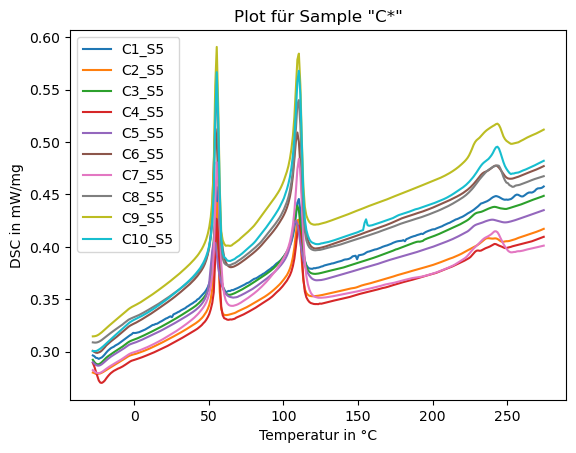

In [21]:
plot_columns_containing(dframe, "C*", segment="S5")

## 3. Speichern

In [17]:
# Pfad zur CSV-Datei, in die das DataFrame exportiert werden soll
csv_dateipfad = 'data/measurements.csv'

# Exportieren des DataFrames als CSV-Datei mit Semikolon als Trennzeichen
measurements_df.to_csv(csv_dateipfad, sep=';', index=True)